# Project: Mapping the State-Space of Stem Cell "Decisions"

### 1. Background : Stem Cell Differentiation
In biology, every cell in your body contains the same "source code" (DNA). However, a heart cell behaves differently from a neuron because they are "executing" different parts of that code. However, in order to reach their fates ('final' cell type), cells undergo a journey, the so called **cell differenciation** or **cell specification**. 

Biologists often use the **Waddington Landscape** analogy: imagine a ball rolling down a hilly terrain. At the top (0h), the ball can go down many different valleys. By the bottom (168h), the ball is stuck in one specific path.

![alt text](waddington2.png)


### 2. Data

We quantify this execution by measuring the levels of **Gene Expression** throughout development.

In the current project, the data follows **Mouse Embryonic Stem Cells (ESCs)** over a period of 7 days (168 hours). 
At $T=0$, the cells are "Pluripotent"—think of them as uninitialized objects that have the potential to become almost any tissue type. As time progresses, they interprete gene expression levels as signals to **differentiate**. At the end of the experiement, we get two cell types: **E14** and **R1**.

The **Single-Cell Gene Expression** dataset at our disposal is the following. 
*   **Dimensions:** Each cell is a data object described by **96 features** (different marker genes, in addition to time and type of cell).

| Feature | Type | Description |
| :--- | :--- | :--- |
| **Time** | `int` | The timestamp of the snapshot (0h, 24h, 48h, 72h, 96h, 120h, 168h). |
| **Type** | `string` | The cell line background (**E14** or **R1**). These are two different "classes" of stem cells. |
| **Genes** | `float` | **96 columns** (e.g., *Actb, Nanog, Sox2...*). These represent the normalized expression level of specific genes. |


*** 
*Data Source & Paper: Patrick S. Stumpf, "Stem Cell Differentiation as a Non-Markov Stochastic Process," Cell Systems, 2017.*

### Part 1. Load the dataset
Read the "gene_expression_data.csv" dataset into a pandas dataframe. 

Once loaded, you can use the "head()", "info()" or "describe()" functions for an overview of the dataset and its summary statistics. Below is an example result of head() applied to the dataset.

![alt text](head.png)

Tip: Because the dataset, although high-dimensional, only has 96 columns, you can also open the dataset using Excel and view it in tabular form by using the the "text-to-columns" feature of MS Excel (https://www.youtube.com/watch?v=QyZ6IMkln2U).

In [3]:
########## Part 1. Write your code in this cell ############
import pandas as pd
DataFrame = pd.read_csv("gene_expression_data.csv")
DataFrame.head()
DataFrame.info()
DataFrame.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 672 entries, 0 to 671
Data columns (total 100 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Sample       672 non-null    object 
 1   Time         672 non-null    int64  
 2   Type         672 non-null    object 
 3   Actb         672 non-null    float64
 4   Bmi1         672 non-null    float64
 5   Bmp4         672 non-null    float64
 6   Bmp7         672 non-null    float64
 7   Bmpr1a       672 non-null    float64
 8   Cd34         672 non-null    float64
 9   Cdh1         672 non-null    float64
 10  Cdh2         672 non-null    float64
 11  Cdk2         672 non-null    float64
 12  Cdx2         672 non-null    float64
 13  Cldn6        672 non-null    float64
 14  Ctcf         672 non-null    float64
 15  Ctnnb1       672 non-null    float64
 16  Dnmt1        672 non-null    float64
 17  Dnmt3b       672 non-null    float64
 18  Dppa3        672 non-null    float64
 19  Dppa4  

,Time,Actb,Bmi1,Bmp4,Bmp7,Bmpr1a,Cd34,Cdh1,Cdh2,Cdk2,...,Trp53,Tubb3,Utf1,Vim,Wdr5,Wnt3a,Wnt5a,Zfp281,Zfp42,Unnamed: 99
count,672.000000,672.000000,672.000000,672.000000,672.000000,672.000000,672.000000,672.000000,672.000000,672.000000,...,672.000000,672.000000,672.000000,672.000000,672.000000,672.000000,672.000000,672.000000,672.000000,0.0
mean,75.428571,12.377205,11.976088,6.244000,4.068762,11.610363,4.482534,1.397655,8.931125,13.048527,...,13.658990,10.666037,9.768530,12.141370,13.666779,0.528408,2.413624,13.276669,11.279610,NaN
std,53.595891,3.432095,8.962781,8.471986,7.742769,8.471375,7.887637,5.223971,8.746990,6.344623,...,7.002394,7.553979,9.452657,5.425433,6.168196,3.185408,6.157581,5.206771,8.010143,NaN
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,NaN
25%,24.000000,11.101322,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,14.219347,...,13.882878,0.000000,0.000000,11.225797,14.284870,0.000000,0.000000,13.440029,0.000000,NaN
50%,72.000000,12.042371,17.501303,0.000000,0.000000,16.605809,0.000000,0.000000,13.165899,15.242582,...,15.404653,14.352203,13.613278,13.220965,15.446349,0.000000,0.000000,14.570411,14.455191,NaN
75%,120.000000,13.505988,18.864963,15.929201,0.000000,17.704601,0.000000,0.000000,17.272788,16.228071,...,17.557285,16.246390,17.947361,15.210808,16.756173,0.000000,0.000000,15.649989,17.664843,NaN
max,168.000000,27.142670,26.490094,33.325570,22.903472,38.322297,25.942512,30.676944,27.925612,26.021266,...,33.824599,25.765562,27.339623,25.643899,26.400810,34.010038,22.197124,25.542115,25.736600,NaN


### Part 2. Visualize some data
Because the dataset is high-dimensional (cells are described across 96 genes), we canNOT visualize all genes. In this part, we will restrict our focus on two genes: "Bmp4" and "Nanog".

Create a figure with two plots (one for each gene), where each plot shows, at each time (0H, 24H, ..., 168H), the statistics of expresssion levels of the genes in cells. What plot types are appropriate for this ?
Hint: you may want to have time on the x-asis  

Bonus: There are two types of cells in the dataset (E14 and R1). Can you enhance the plot to visualize the expression levels within each cell type ? What do you observe ?

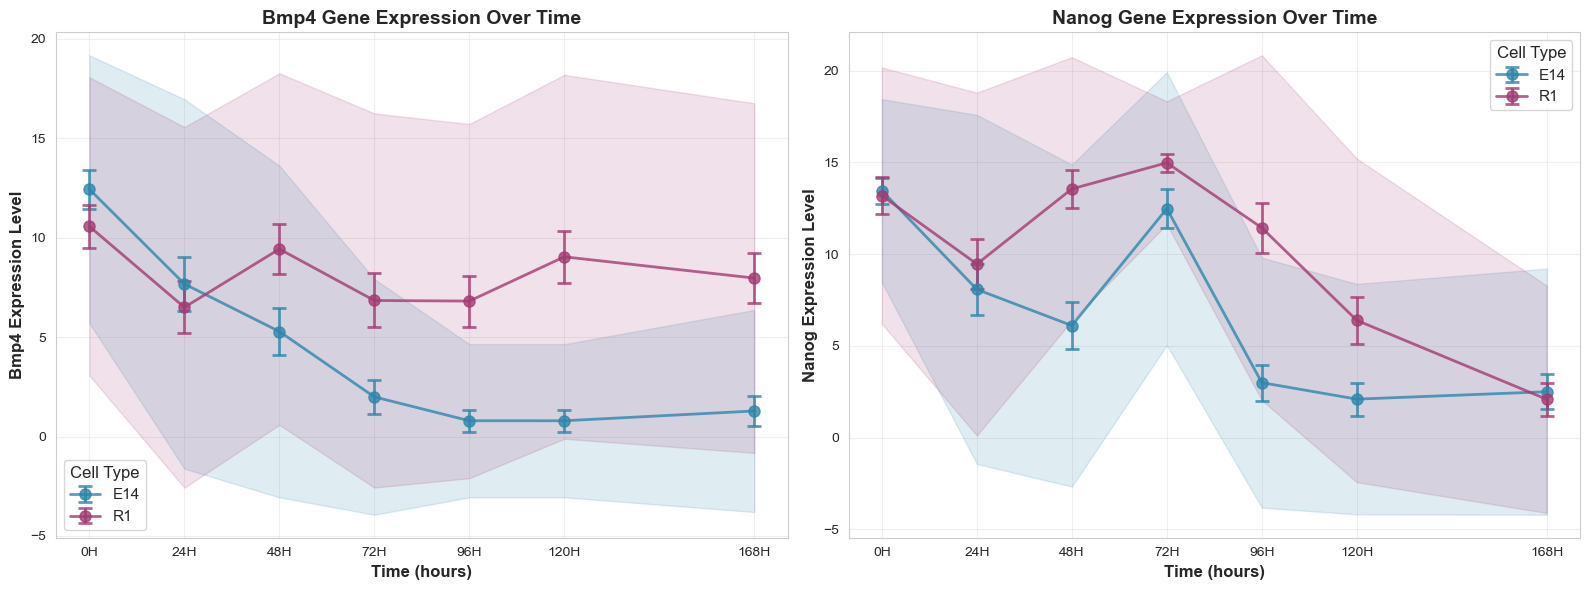


SUMMARY STATISTICS

Bmp4 Gene Expression:
----------------------------------------

E14 cells:
  Overall Mean: 4.32
  Overall Std:  7.60

  Expression by Time Point:
    0: Mean=12.44, Std=6.73, N=48
    24: Mean=7.67, Std=9.29, N=48
    48: Mean=5.28, Std=8.34, N=48
    72: Mean=1.99, Std=5.93, N=48
    96: Mean=0.79, Std=3.85, N=48
    120: Mean=0.79, Std=3.85, N=48
    168: Mean=1.29, Std=5.08, N=48

R1 cells:
  Overall Mean: 8.16
  Overall Std:  8.87

  Expression by Time Point:
    0: Mean=10.57, Std=7.50, N=48
    24: Mean=6.50, Std=9.07, N=48
    48: Mean=9.43, Std=8.84, N=48
    72: Mean=6.84, Std=9.41, N=48
    96: Mean=6.81, Std=8.90, N=48
    120: Mean=9.04, Std=9.15, N=48
    168: Mean=7.97, Std=8.79, N=48

Nanog Gene Expression:
----------------------------------------

E14 cells:
  Overall Mean: 6.81
  Overall Std:  8.50

  Expression by Time Point:
    0: Mean=13.46, Std=4.99, N=48
    24: Mean=8.08, Std=9.52, N=48
    48: Mean=6.10, Std=8.78, N=48
    72: Mean=12.48, S

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Load the data
df = pd.read_csv('gene_expression_data.csv')

df['Time_numeric'] = df['Time'].astype(str).str.replace('H', '').astype(int)

# Set up the plot style
sns.set_style("whitegrid")

fig, axes = plt.subplots(1, 2, figsize=(16, 6))

genes = ['Bmp4', 'Nanog']
colors = {'E14': '#2E86AB', 'R1': '#A23B72'}

for idx, gene in enumerate(genes):
    ax = axes[idx]
    

    for cell_type in ['E14', 'R1']:
       
        cell_data = df[df['Type'] == cell_type]
    
        time_stats = cell_data.groupby('Time_numeric')[gene].agg(['mean', 'std', 'count'])
        time_stats = time_stats.reset_index()
        
        # Calculate standard error
        time_stats['se'] = time_stats['std'] / np.sqrt(time_stats['count'])
        
        # Plot the mean with error bars
        ax.errorbar(time_stats['Time_numeric'], 
                   time_stats['mean'],
                   yerr=time_stats['se'],
                   label=f'{cell_type}',
                   marker='o',
                   markersize=8,
                   linewidth=2,
                   capsize=5,
                   capthick=2,
                   color=colors[cell_type],
                   alpha=0.8)
        
        ax.fill_between(time_stats['Time_numeric'],
                       time_stats['mean'] - time_stats['std'],
                       time_stats['mean'] + time_stats['std'],
                       alpha=0.15,
                       color=colors[cell_type])
    
    # Customize the plot
    ax.set_xlabel('Time (hours)', fontsize=12, fontweight='bold')
    ax.set_ylabel(f'{gene} Expression Level', fontsize=12, fontweight='bold')
    ax.set_title(f'{gene} Gene Expression Over Time', fontsize=14, fontweight='bold')
    ax.legend(title='Cell Type', fontsize=11, title_fontsize=12)
    ax.grid(True, alpha=0.3)
    
    # Set x-axis to show all time points
    time_points = sorted(df['Time_numeric'].unique())
    ax.set_xticks(time_points)
    ax.set_xticklabels([f'{t}H' for t in time_points])

plt.tight_layout()
plt.show()

# Print summary statistics
print("\n" + "="*60)
print("SUMMARY STATISTICS")
print("="*60)

for gene in genes:
    print(f"\n{gene} Gene Expression:")
    print("-" * 40)
    
    for cell_type in ['E14', 'R1']:
        cell_data = df[df['Type'] == cell_type]
        
        # Overall statistics
        overall_mean = cell_data[gene].mean()
        overall_std = cell_data[gene].std()
        
        print(f"\n{cell_type} cells:")
        print(f"  Overall Mean: {overall_mean:.2f}")
        print(f"  Overall Std:  {overall_std:.2f}")
        
        # Time-based statistics
        time_stats = cell_data.groupby('Time')[gene].agg(['mean', 'std', 'count'])
        print(f"\n  Expression by Time Point:")
        for time_point in time_stats.index:
            mean_val = time_stats.loc[time_point, 'mean']
            std_val = time_stats.loc[time_point, 'std']
            count = time_stats.loc[time_point, 'count']
            print(f"    {time_point}: Mean={mean_val:.2f}, Std={std_val:.2f}, N={count}")

### Part 3. Relationships between genes
Because the dataset is high-dimensional (cells are described across 96 genes), we canNOT visualize all relationships between our variables (genes). However, as in almost every real-world datasets, variables entertain strong or weak relations. In this part, we will try to identity which genes that have strong ties, and attempt to visualize how the behave together.

Once more, because the dataset is multi-dimensional, we will restrict our analysis to the subset of genes (although we can get away with an analysis of the whole set of genes in our current scenario of 96 genes) 

    genes = ['Nanog', 'Pou5f1', 'Sox2', 'Gata6', 'Pax6', 'Sox1', 'Actb', 'Bmp4'].

Create a figure with the following plots:

1. A **correlation heatmap** showing the correlations of all genes above at time O
2. A **correlation heatmap** showing the correlations of all genes above at time 168
3. From the first plot, pick the two genes with the highest correlation and create a **scatter plot** of both. Does the scatter trend verify the observed correlation ? Compare their correlation at time 168. What do you observe ?
4. From the second plot, pick the two genes with the highest correlation and create a **scatter plot** of both. Does the scatter trend verify the observed correlation ? Compare their correlation at time 0. What do you observe ?

Bonus: i.Think about improvements you could make on the scatter plots. What comes to mind ? Create a figure with two plots (Hint: different colors and/or markers for the two different cell types, etc.)
ii. How does the relationship of the 2 genes picked at (3.) evolve through all time points (0,24,48,72,69,120,144,168) ? What plot(s) can you use for this ? 

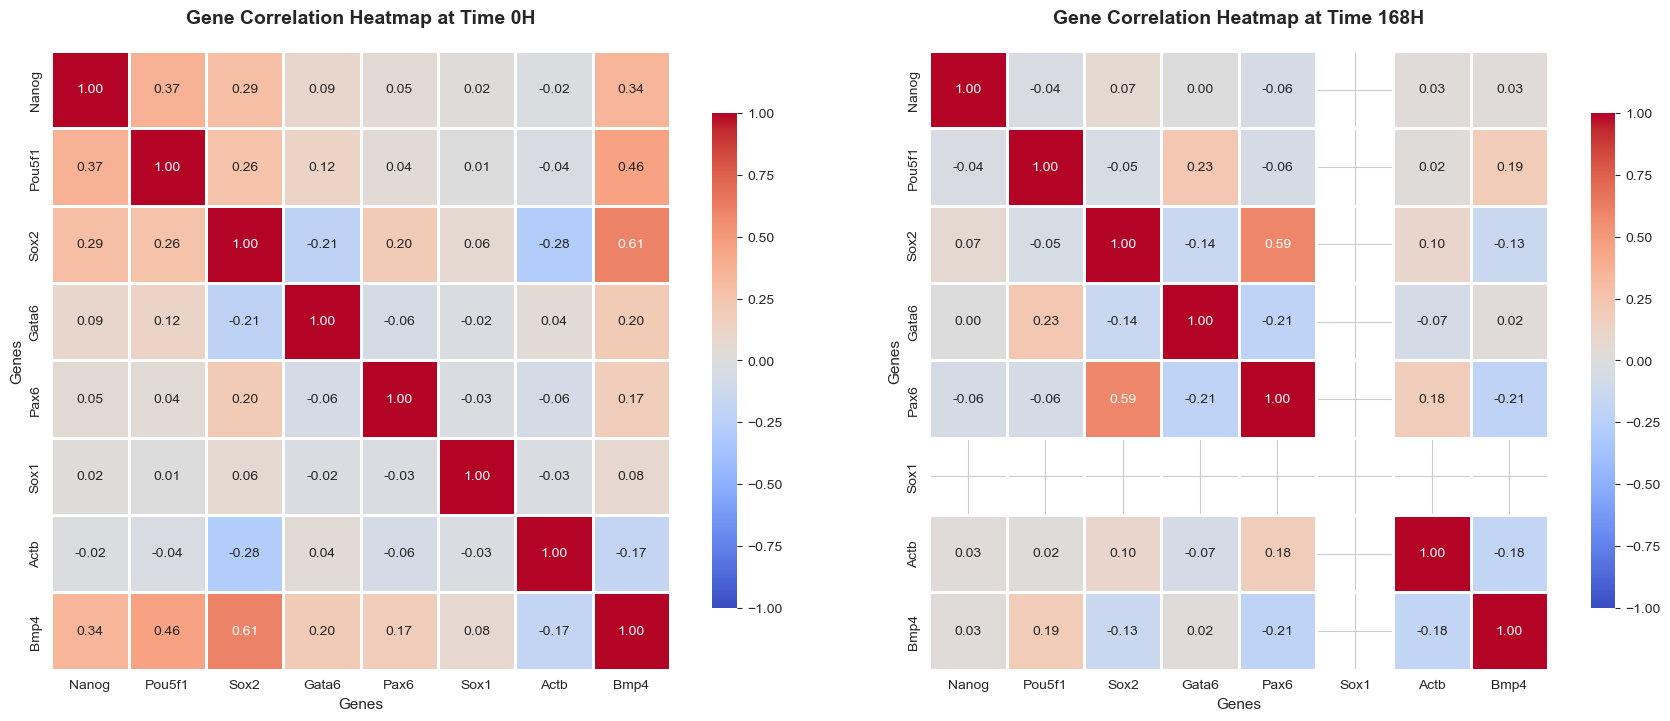

HIGHEST CORRELATIONS

Time 0H: Sox2 vs Bmp4
  Correlation: 0.605
  Their correlation at Time 168H: -0.135

Time 168H: Sox2 vs Pax6
  Correlation: 0.594
  Their correlation at Time 0H: 0.198


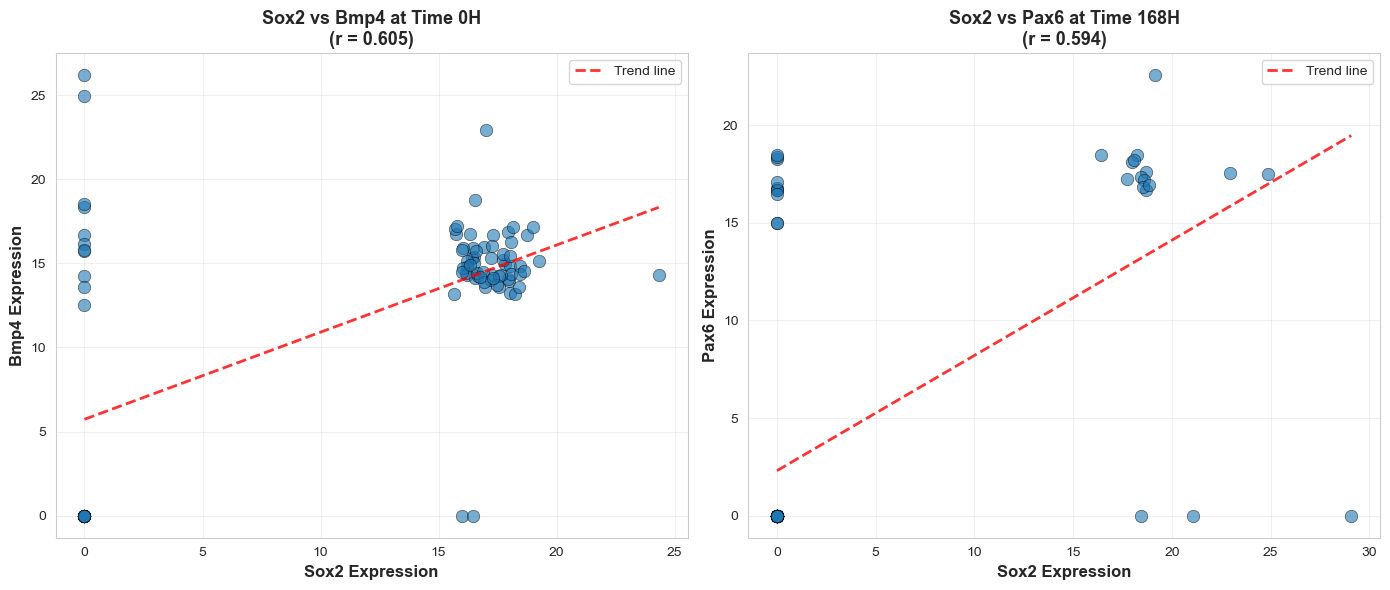

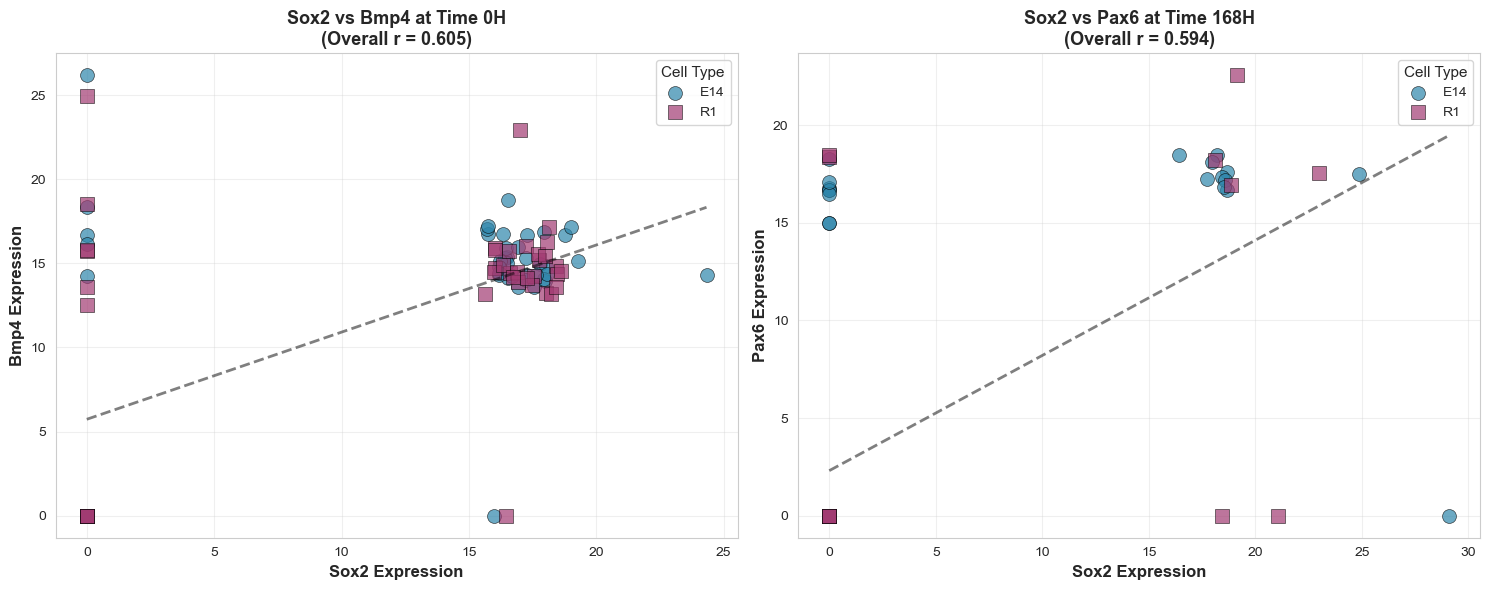


CORRELATIONS BY CELL TYPE

Time 0H - Sox2 vs Bmp4:
  E14: r = 0.563
  R1: r = 0.629

Time 168H - Sox2 vs Pax6:
  E14: r = 0.565
  R1: r = 0.617


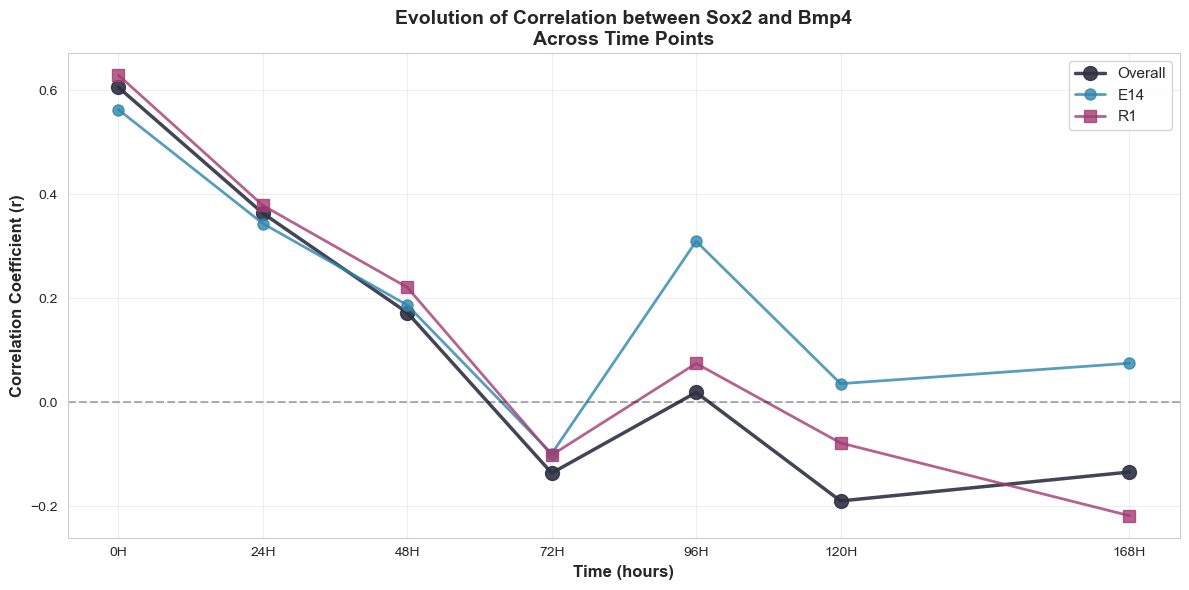


CORRELATION EVOLUTION: Sox2 vs Bmp4

Time Point | Overall  | E14      | R1
--------------------------------------------------
  0H       |   0.605  |   0.563  |   0.629
 24H       |   0.363  |   0.344  |   0.378
 48H       |   0.172  |   0.187  |   0.221
 72H       |  -0.137  |  -0.099  |  -0.102
 96H       |   0.019  |   0.309  |   0.074
120H       |  -0.190  |   0.035  |  -0.079
168H       |  -0.135  |   0.075  |  -0.219


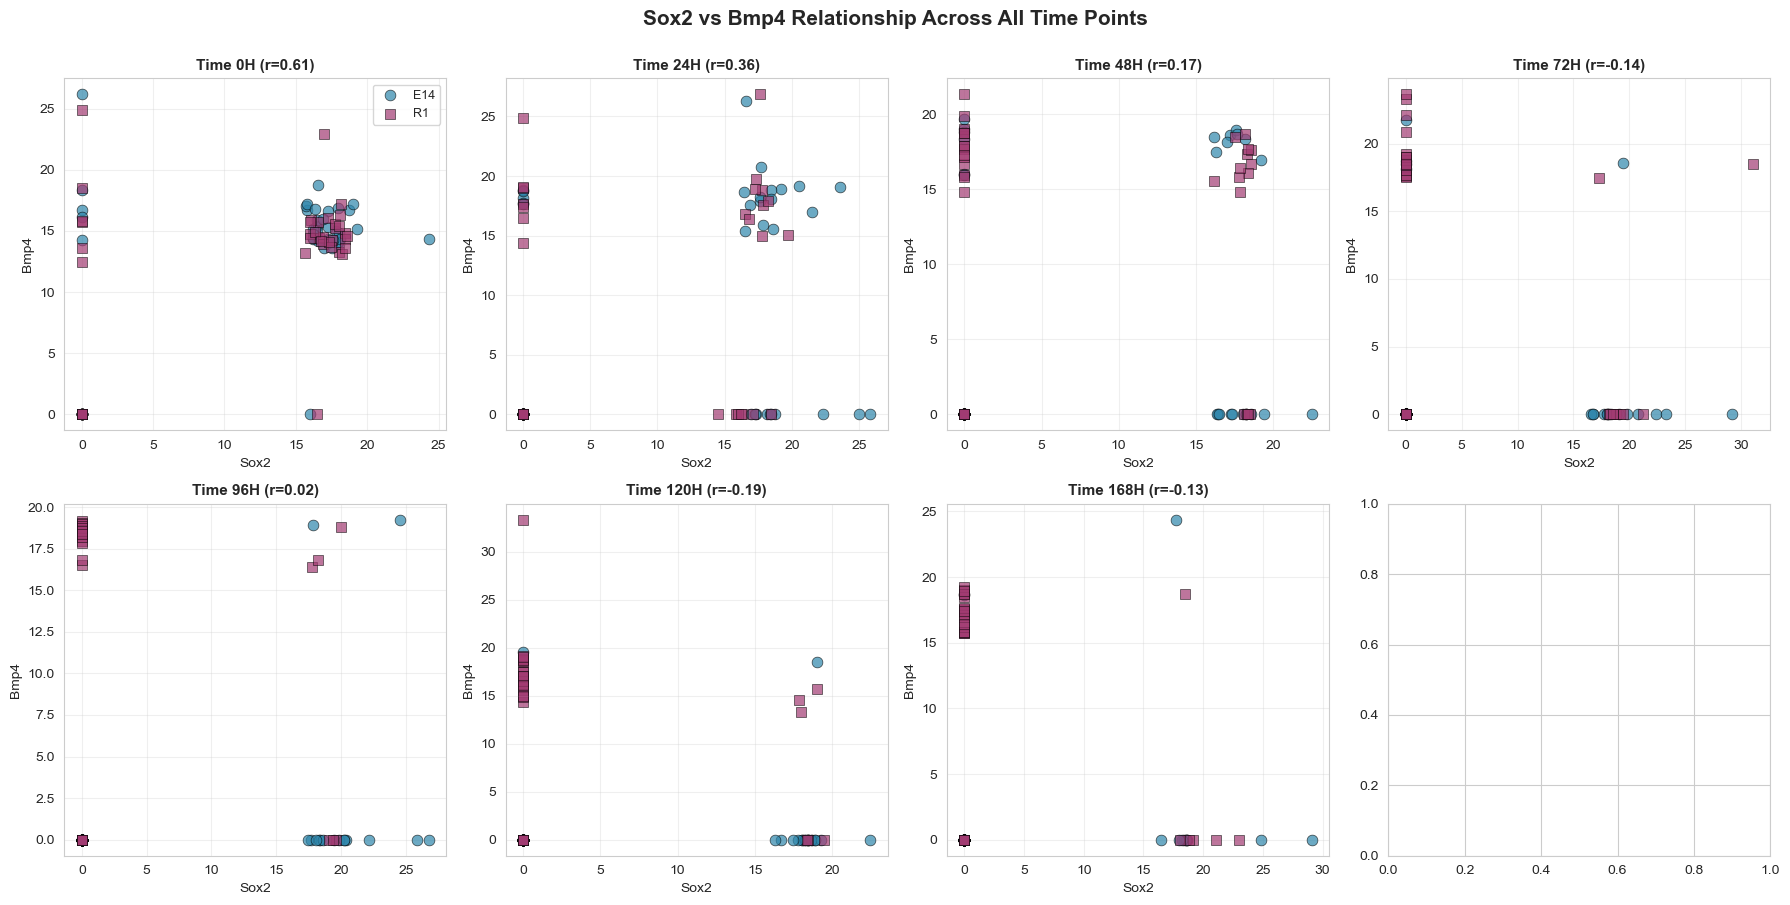


ANALYSIS COMPLETE!


In [ ]:
########## Part 3. Write your code in this cell ############
df = pd.read_csv('gene_expression_data.csv')

# Extract time as numeric values
df['Time_numeric'] = df['Time'].astype(str).str.replace('H', '').astype(int)

# Define the subset of genes to analyze
genes = ['Nanog', 'Pou5f1', 'Sox2', 'Gata6', 'Pax6', 'Sox1', 'Actb', 'Bmp4']

# Filter data for time 0 and time 168
df_time0 = df[df['Time_numeric'] == 0]
df_time168 = df[df['Time_numeric'] == 168]

# Calculate correlation matrices
corr_time0 = df_time0[genes].corr()
corr_time168 = df_time168[genes].corr()

# PART 1 & 2: Correlation Heatmaps

fig, axes = plt.subplots(1, 2, figsize=(18, 7))

# Heatmap for time 0
sns.heatmap(corr_time0, annot=True, fmt='.2f', cmap='coolwarm', 
            center=0, vmin=-1, vmax=1, square=True, 
            linewidths=1, cbar_kws={"shrink": 0.8},
            ax=axes[0])
axes[0].set_title('Gene Correlation Heatmap at Time 0H', fontsize=14, fontweight='bold', pad=20)
axes[0].set_xlabel('Genes', fontsize=11)
axes[0].set_ylabel('Genes', fontsize=11)

# Heatmap for time 168
sns.heatmap(corr_time168, annot=True, fmt='.2f', cmap='coolwarm', 
            center=0, vmin=-1, vmax=1, square=True, 
            linewidths=1, cbar_kws={"shrink": 0.8},
            ax=axes[1])
axes[1].set_title('Gene Correlation Heatmap at Time 168H', fontsize=14, fontweight='bold', pad=20)
axes[1].set_xlabel('Genes', fontsize=11)
axes[1].set_ylabel('Genes', fontsize=11)

plt.tight_layout()
plt.show()

# Find highest correlations (excluding diagonal)

# For time 0
corr_time0_no_diag = corr_time0.copy()
np.fill_diagonal(corr_time0_no_diag.values, -2)  # Set diagonal to very low value
max_corr_time0 = corr_time0_no_diag.max().max()
max_idx_time0 = np.where(corr_time0_no_diag.values == max_corr_time0)
gene1_time0 = genes[max_idx_time0[0][0]]
gene2_time0 = genes[max_idx_time0[1][0]]

# For time 168
corr_time168_no_diag = corr_time168.copy()
np.fill_diagonal(corr_time168_no_diag.values, -2)
max_corr_time168 = corr_time168_no_diag.max().max()
max_idx_time168 = np.where(corr_time168_no_diag.values == max_corr_time168)
gene1_time168 = genes[max_idx_time168[0][0]]
gene2_time168 = genes[max_idx_time168[1][0]]

print("="*70)
print("HIGHEST CORRELATIONS")
print("="*70)
print(f"\nTime 0H: {gene1_time0} vs {gene2_time0}")
print(f"  Correlation: {max_corr_time0:.3f}")
print(f"  Their correlation at Time 168H: {corr_time168.loc[gene1_time0, gene2_time0]:.3f}")

print(f"\nTime 168H: {gene1_time168} vs {gene2_time168}")
print(f"  Correlation: {max_corr_time168:.3f}")
print(f"  Their correlation at Time 0H: {corr_time0.loc[gene1_time168, gene2_time168]:.3f}")

# PART 3 & 4: Basic Scatter Plots

fig, axes = plt.subplots(1, 2, figsize=(14, 6))

# Scatter plot for highest correlation at time 0
axes[0].scatter(df_time0[gene1_time0], df_time0[gene2_time0], 
                alpha=0.6, s=80, edgecolors='black', linewidth=0.5)
axes[0].set_xlabel(f'{gene1_time0} Expression', fontsize=12, fontweight='bold')
axes[0].set_ylabel(f'{gene2_time0} Expression', fontsize=12, fontweight='bold')
axes[0].set_title(f'{gene1_time0} vs {gene2_time0} at Time 0H\n(r = {max_corr_time0:.3f})', 
                  fontsize=13, fontweight='bold')
axes[0].grid(True, alpha=0.3)

# Add trend line
z = np.polyfit(df_time0[gene1_time0], df_time0[gene2_time0], 1)
p = np.poly1d(z)
x_line = np.linspace(df_time0[gene1_time0].min(), df_time0[gene1_time0].max(), 100)
axes[0].plot(x_line, p(x_line), "r--", alpha=0.8, linewidth=2, label='Trend line')
axes[0].legend()

# Scatter plot for highest correlation at time 168
axes[1].scatter(df_time168[gene1_time168], df_time168[gene2_time168], 
                alpha=0.6, s=80, edgecolors='black', linewidth=0.5)
axes[1].set_xlabel(f'{gene1_time168} Expression', fontsize=12, fontweight='bold')
axes[1].set_ylabel(f'{gene2_time168} Expression', fontsize=12, fontweight='bold')
axes[1].set_title(f'{gene1_time168} vs {gene2_time168} at Time 168H\n(r = {max_corr_time168:.3f})', 
                  fontsize=13, fontweight='bold')
axes[1].grid(True, alpha=0.3)

# Add trend line
z = np.polyfit(df_time168[gene1_time168], df_time168[gene2_time168], 1)
p = np.poly1d(z)
x_line = np.linspace(df_time168[gene1_time168].min(), df_time168[gene1_time168].max(), 100)
axes[1].plot(x_line, p(x_line), "r--", alpha=0.8, linewidth=2, label='Trend line')
axes[1].legend()

plt.tight_layout()
plt.show()

# BONUS (i): Enhanced Scatter Plots with Cell Type Information

fig, axes = plt.subplots(1, 2, figsize=(15, 6))

colors = {'E14': '#2E86AB', 'R1': '#A23B72'}
markers = {'E14': 'o', 'R1': 's'}

# Enhanced scatter plot for time 0
for cell_type in ['E14', 'R1']:
    data = df_time0[df_time0['Type'] == cell_type]
    axes[0].scatter(data[gene1_time0], data[gene2_time0], 
                   c=colors[cell_type], marker=markers[cell_type],
                   alpha=0.7, s=100, edgecolors='black', linewidth=0.5,
                   label=cell_type)

axes[0].set_xlabel(f'{gene1_time0} Expression', fontsize=12, fontweight='bold')
axes[0].set_ylabel(f'{gene2_time0} Expression', fontsize=12, fontweight='bold')
axes[0].set_title(f'{gene1_time0} vs {gene2_time0} at Time 0H\n(Overall r = {max_corr_time0:.3f})', 
                  fontsize=13, fontweight='bold')
axes[0].grid(True, alpha=0.3)
axes[0].legend(title='Cell Type', fontsize=10, title_fontsize=11)

# Add overall trend line
z = np.polyfit(df_time0[gene1_time0], df_time0[gene2_time0], 1)
p = np.poly1d(z)
x_line = np.linspace(df_time0[gene1_time0].min(), df_time0[gene1_time0].max(), 100)
axes[0].plot(x_line, p(x_line), "k--", alpha=0.5, linewidth=2, label='Overall trend')

# Enhanced scatter plot for time 168
for cell_type in ['E14', 'R1']:
    data = df_time168[df_time168['Type'] == cell_type]
    axes[1].scatter(data[gene1_time168], data[gene2_time168], 
                   c=colors[cell_type], marker=markers[cell_type],
                   alpha=0.7, s=100, edgecolors='black', linewidth=0.5,
                   label=cell_type)

axes[1].set_xlabel(f'{gene1_time168} Expression', fontsize=12, fontweight='bold')
axes[1].set_ylabel(f'{gene2_time168} Expression', fontsize=12, fontweight='bold')
axes[1].set_title(f'{gene1_time168} vs {gene2_time168} at Time 168H\n(Overall r = {max_corr_time168:.3f})', 
                  fontsize=13, fontweight='bold')
axes[1].grid(True, alpha=0.3)
axes[1].legend(title='Cell Type', fontsize=10, title_fontsize=11)

# Add overall trend line
z = np.polyfit(df_time168[gene1_time168], df_time168[gene2_time168], 1)
p = np.poly1d(z)
x_line = np.linspace(df_time168[gene1_time168].min(), df_time168[gene1_time168].max(), 100)
axes[1].plot(x_line, p(x_line), "k--", alpha=0.5, linewidth=2, label='Overall trend')

plt.tight_layout()
plt.show()

# Calculate correlations by cell type
print("\n" + "="*70)
print("CORRELATIONS BY CELL TYPE")
print("="*70)

print(f"\nTime 0H - {gene1_time0} vs {gene2_time0}:")
for cell_type in ['E14', 'R1']:
    data = df_time0[df_time0['Type'] == cell_type]
    corr_val = data[[gene1_time0, gene2_time0]].corr().iloc[0, 1]
    print(f"  {cell_type}: r = {corr_val:.3f}")

print(f"\nTime 168H - {gene1_time168} vs {gene2_time168}:")
for cell_type in ['E14', 'R1']:
    data = df_time168[df_time168['Type'] == cell_type]
    corr_val = data[[gene1_time168, gene2_time168]].corr().iloc[0, 1]
    print(f"  {cell_type}: r = {corr_val:.3f}")


# BONUS (ii): Correlation Evolution Over Time

# Calculate correlation at each time point for the gene pair from time 0
time_points = sorted(df['Time_numeric'].unique())
correlations_overall = []
correlations_E14 = []
correlations_R1 = []

for t in time_points:
    data_t = df[df['Time_numeric'] == t]
    
    # Overall correlation
    corr_overall = data_t[[gene1_time0, gene2_time0]].corr().iloc[0, 1]
    correlations_overall.append(corr_overall)
    
    # E14 correlation
    data_E14 = data_t[data_t['Type'] == 'E14']
    corr_E14 = data_E14[[gene1_time0, gene2_time0]].corr().iloc[0, 1]
    correlations_E14.append(corr_E14)
    
    # R1 correlation
    data_R1 = data_t[data_t['Type'] == 'R1']
    corr_R1 = data_R1[[gene1_time0, gene2_time0]].corr().iloc[0, 1]
    correlations_R1.append(corr_R1)

# Plot correlation evolution
fig, ax = plt.subplots(figsize=(12, 6))

ax.plot(time_points, correlations_overall, marker='o', linewidth=2.5, 
        markersize=10, label='Overall', color='#2D3142', alpha=0.9)
ax.plot(time_points, correlations_E14, marker='o', linewidth=2, 
        markersize=8, label='E14', color='#2E86AB', alpha=0.8)
ax.plot(time_points, correlations_R1, marker='s', linewidth=2, 
        markersize=8, label='R1', color='#A23B72', alpha=0.8)

ax.set_xlabel('Time (hours)', fontsize=12, fontweight='bold')
ax.set_ylabel('Correlation Coefficient (r)', fontsize=12, fontweight='bold')
ax.set_title(f'Evolution of Correlation between {gene1_time0} and {gene2_time0}\nAcross Time Points', 
             fontsize=14, fontweight='bold')
ax.set_xticks(time_points)
ax.set_xticklabels([f'{t}H' for t in time_points])
ax.grid(True, alpha=0.3)
ax.legend(fontsize=11)
ax.axhline(y=0, color='k', linestyle='--', alpha=0.3)

plt.tight_layout()
plt.show()

print("\n" + "="*70)
print(f"CORRELATION EVOLUTION: {gene1_time0} vs {gene2_time0}")
print("="*70)
print("\nTime Point | Overall  | E14      | R1")
print("-" * 50)
for i, t in enumerate(time_points):
    print(f"{t:>3}H       | {correlations_overall[i]:>7.3f}  | {correlations_E14[i]:>7.3f}  | {correlations_R1[i]:>7.3f}")

# Additional Analysis: Scatter plots at multiple time points

fig, axes = plt.subplots(2, 4, figsize=(18, 9))
axes = axes.flatten()

for idx, t in enumerate(time_points):
    data_t = df[df['Time_numeric'] == t]
    
    for cell_type in ['E14', 'R1']:
        cell_data = data_t[data_t['Type'] == cell_type]
        axes[idx].scatter(cell_data[gene1_time0], cell_data[gene2_time0],
                         c=colors[cell_type], marker=markers[cell_type],
                         alpha=0.7, s=60, edgecolors='black', linewidth=0.5,
                         label=cell_type)
    
    # Calculate and display correlation
    corr_val = data_t[[gene1_time0, gene2_time0]].corr().iloc[0, 1]
    
    axes[idx].set_xlabel(f'{gene1_time0}', fontsize=10)
    axes[idx].set_ylabel(f'{gene2_time0}', fontsize=10)
    axes[idx].set_title(f'Time {t}H (r={corr_val:.2f})', fontsize=11, fontweight='bold')
    axes[idx].grid(True, alpha=0.3)
    
    if idx == 0:
        axes[idx].legend(fontsize=9)

plt.suptitle(f'{gene1_time0} vs {gene2_time0} Relationship Across All Time Points', 
             fontsize=15, fontweight='bold', y=1.00)
plt.tight_layout()
plt.show()

print("\n" + "="*70)
print("ANALYSIS COMPLETE!")
print("="*70)

### Part 4. Dimensionality Reduction (PCA)
We can only do so much in trying to visualize our dataset one variable at the time, or 2 variables at the time. Our dataset is high-dimensional, we must therefore use appropriate methods to visualize it. Most notably, dimensionality reduction methods.

1. Perform **Principal Component Analysis (PCA)** on the data, keeping only 2 dimensions
(Hint: you don't need to pass columns 'Time' and 'Type' to PCA as they do not contain information on genes. Extract just genes columns and pass it to PCA. The line below shows how you can 'drop' those columns)

    X = df.drop(['Time', 'Type'], axis=1)

2. Determine the 'importance' of each of your principal component ? How do you inteprete that ?

3. Create a scatter plot on the resulting two dimensional data (PC1 vs PC2). What do you observe ? Can you identified different trajectories in time for different cell types (E14, R1) ?

4. Enhance the scatter plot using different marker types for cell type (E14, R1) and different colors for time (0, 24, ..., 268). What do you observe ?

Bonus: Perform **Principal Component Analysis (PCA)** on the data, this time keeping 3 dimensions. Redo steps 1-4

DATA PREPROCESSING
Original data shape: (672, 103)
Number of NaN values: 672
NaN values replaced with 0 (no expression)

PCA WITH 2 COMPONENTS - COMPLETED
PCA transformed shape: (672, 2)

PRINCIPAL COMPONENT IMPORTANCE

PC1 Explained Variance: 0.2093 (20.93%)
PC2 Explained Variance: 0.0918 (9.18%)

Cumulative Variance Explained: 0.3010 (30.10%)

Interpretation:
- PC1 captures 20.93% of the total variance in the data
- PC2 captures an additional 9.18% of variance
- Together, these 2 components explain 30.10% of all variation


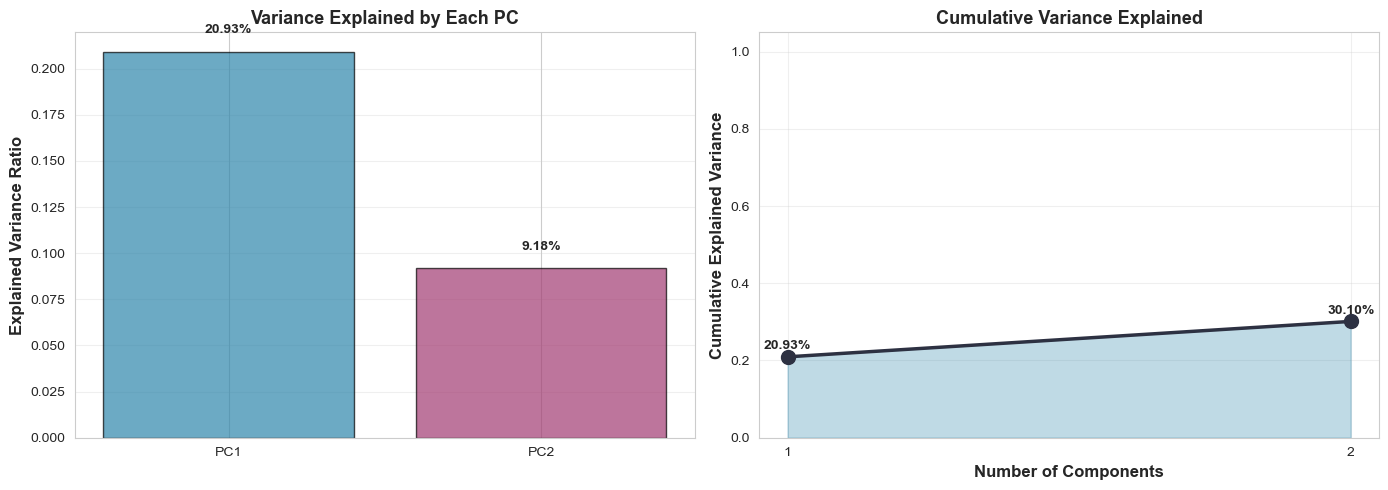

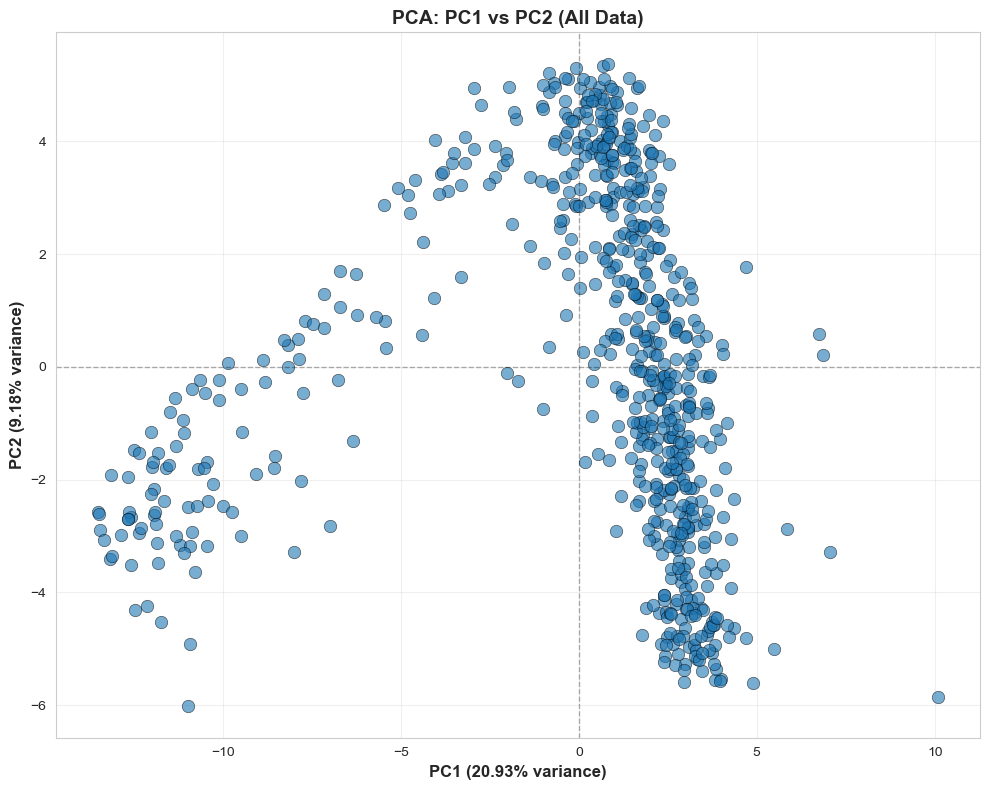

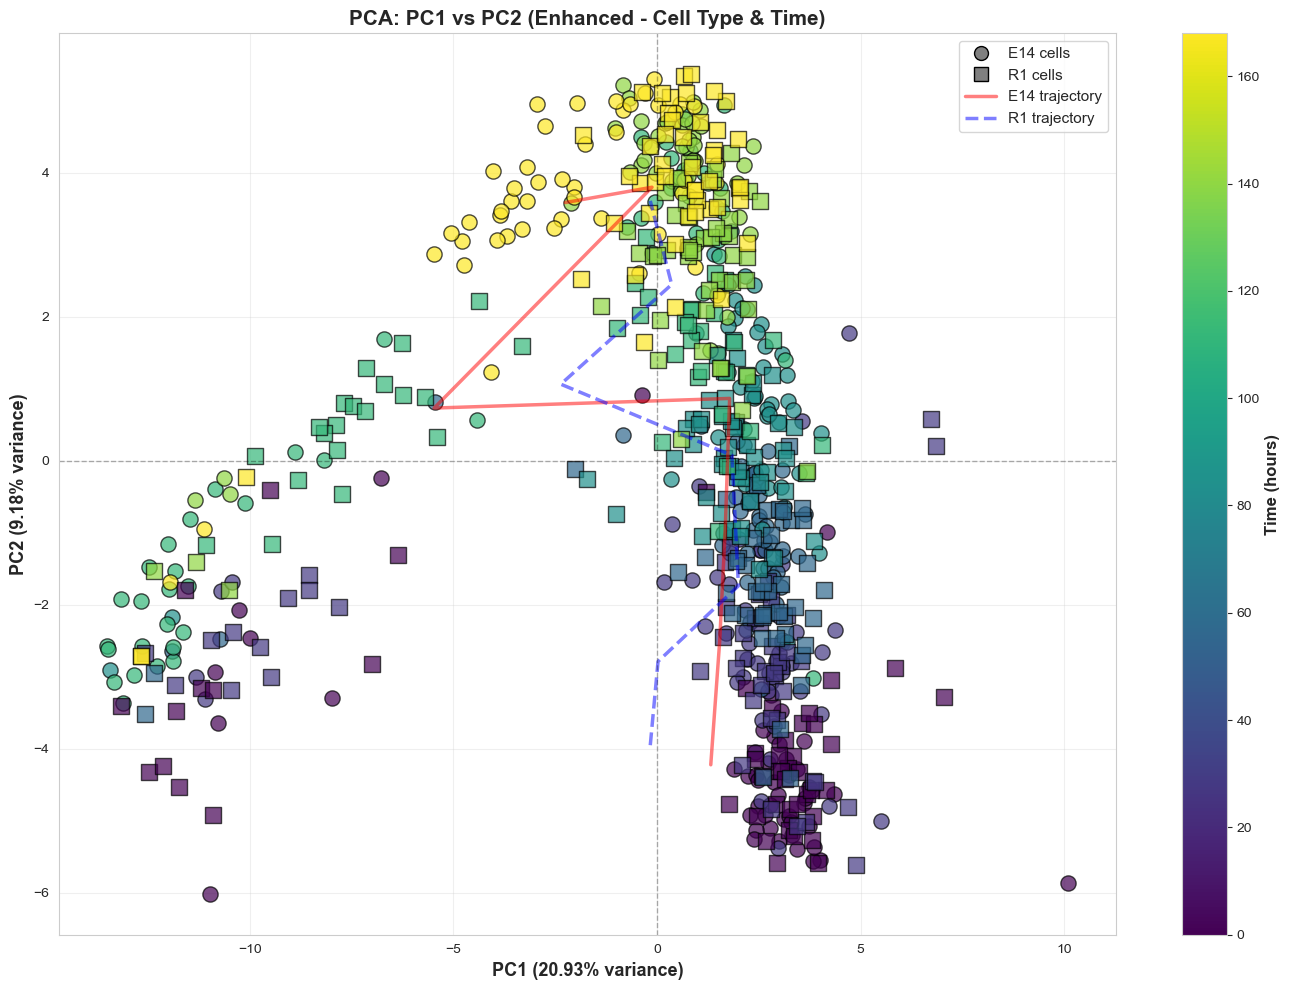


OBSERVATIONS

Key Observations:

1. CELL TYPE DIFFERENCES:
   - Circles (E14) vs Squares (R1) show different distributions
   - Each cell type follows its own trajectory through PC space

2. TIME PROGRESSION:
   - Color gradient (dark purple → yellow) shows time progression
   - Early time points (dark) cluster together
   - Later time points (bright) move to different regions

3. DIFFERENTIATION TRAJECTORIES:
   - Red line (E14) and blue dashed line (R1) show average paths
   - Both cell types start in similar regions (time 0)
   - They diverge and follow different paths as differentiation proceeds


BONUS: PCA WITH 3 COMPONENTS

PC1: 20.93%
PC2: 9.18%
PC3: 4.69%
Total: 34.80%


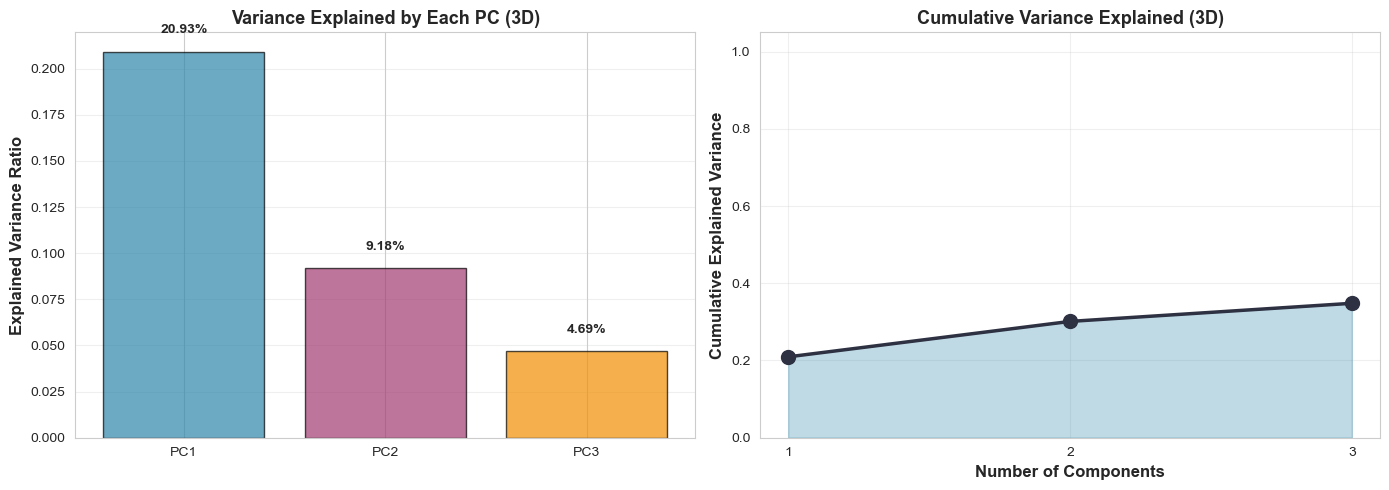

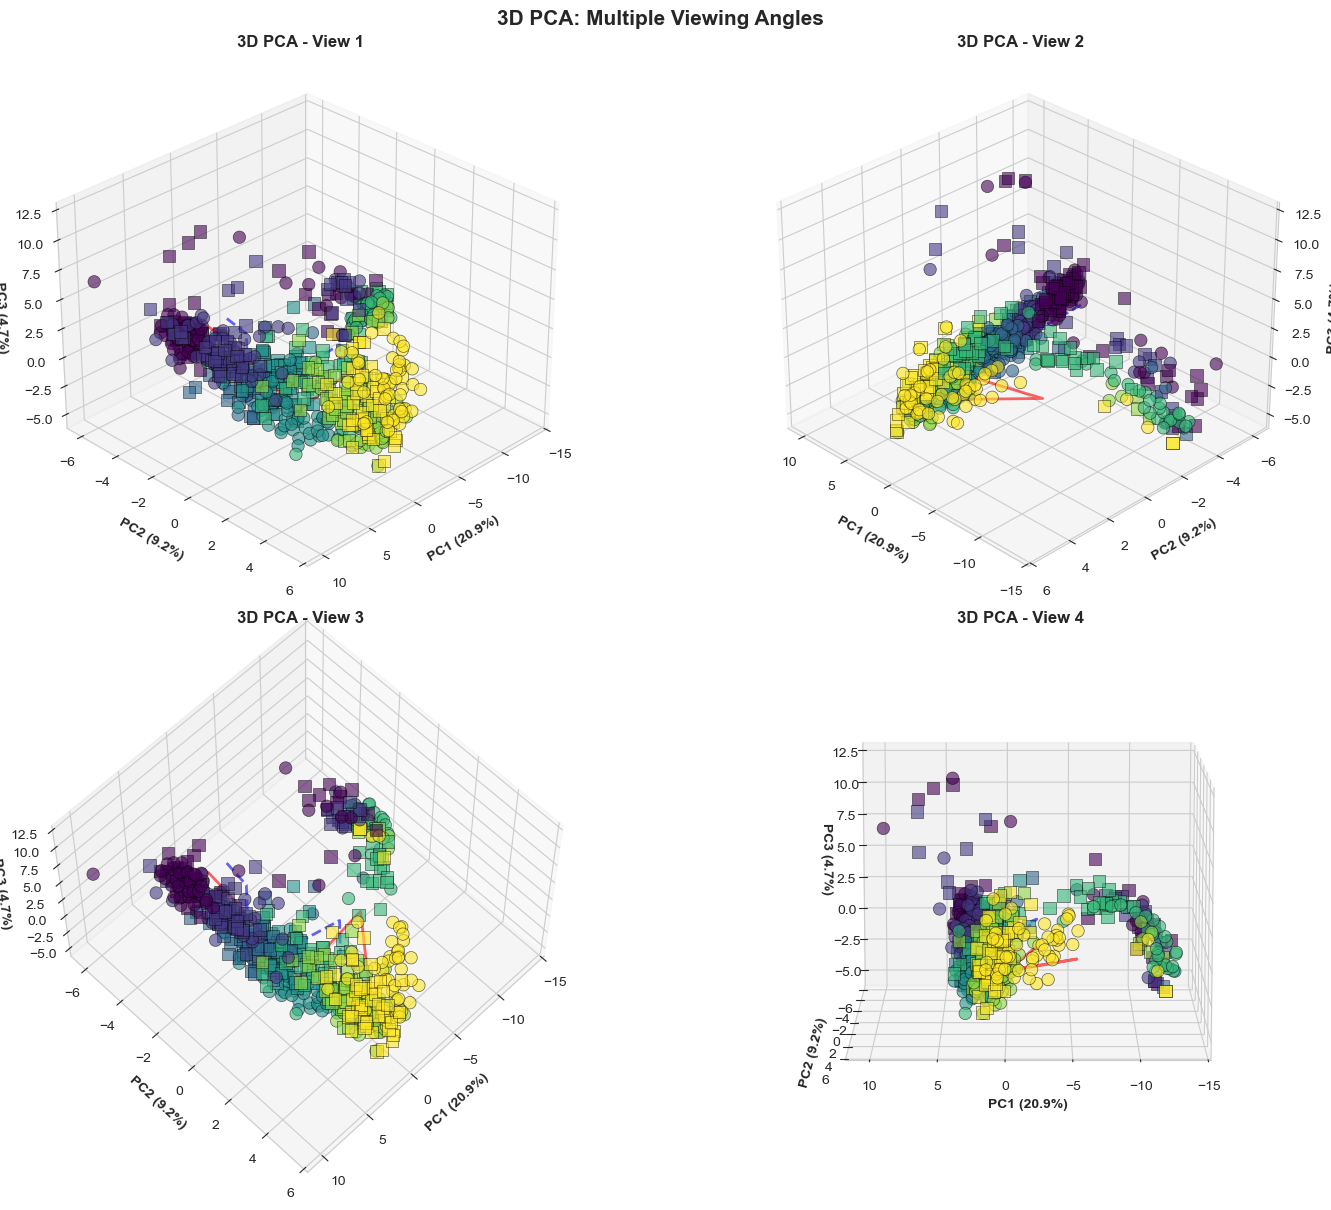


ANALYSIS COMPLETE!


In [ ]:

# PART 1: Perform PCA with 2 components (with NaN handling)
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

# Extract only gene expression columns (drop Time, Type, Sample)
X = df.drop(['Sample', 'Time', 'Type'], axis=1)

# Handle NaN values - replace with 0 (meaning no expression detected)
X_filled = X.fillna(0)

print("="*70)
print("DATA PREPROCESSING")
print("="*70)
print(f"Original data shape: {X.shape}")
print(f"Number of NaN values: {X.isna().sum().sum()}")
print(f"NaN values replaced with 0 (no expression)")

# Standardize the features (important for PCA!)
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_filled)

# Perform PCA with 2 components
pca_2d = PCA(n_components=2)
X_pca_2d = pca_2d.fit_transform(X_scaled)

# Add PCA results back to dataframe
df['PC1'] = X_pca_2d[:, 0]
df['PC2'] = X_pca_2d[:, 1]

print("\n" + "="*70)
print("PCA WITH 2 COMPONENTS - COMPLETED")
print("="*70)
print(f"PCA transformed shape: {X_pca_2d.shape}")


# PART 2: Determine importance of each principal component

explained_variance = pca_2d.explained_variance_ratio_
cumulative_variance = np.cumsum(explained_variance)

print("\n" + "="*70)
print("PRINCIPAL COMPONENT IMPORTANCE")
print("="*70)
print(f"\nPC1 Explained Variance: {explained_variance[0]:.4f} ({explained_variance[0]*100:.2f}%)")
print(f"PC2 Explained Variance: {explained_variance[1]:.4f} ({explained_variance[1]*100:.2f}%)")
print(f"\nCumulative Variance Explained: {cumulative_variance[1]:.4f} ({cumulative_variance[1]*100:.2f}%)")

print("\nInterpretation:")
print(f"- PC1 captures {explained_variance[0]*100:.2f}% of the total variance in the data")
print(f"- PC2 captures an additional {explained_variance[1]*100:.2f}% of variance")
print(f"- Together, these 2 components explain {cumulative_variance[1]*100:.2f}% of all variation")

# Visualize explained variance
fig, axes = plt.subplots(1, 2, figsize=(14, 5))

# Bar plot
axes[0].bar(['PC1', 'PC2'], explained_variance, color=['#2E86AB', '#A23B72'], alpha=0.7, edgecolor='black')
axes[0].set_ylabel('Explained Variance Ratio', fontsize=12, fontweight='bold')
axes[0].set_title('Variance Explained by Each PC', fontsize=13, fontweight='bold')
axes[0].grid(axis='y', alpha=0.3)
for i, v in enumerate(explained_variance):
    axes[0].text(i, v + 0.01, f'{v*100:.2f}%', ha='center', fontweight='bold')

# Cumulative variance plot
axes[1].plot(range(1, 3), cumulative_variance, marker='o', markersize=10, 
             linewidth=2.5, color='#2D3142')
axes[1].fill_between(range(1, 3), cumulative_variance, alpha=0.3, color='#2E86AB')
axes[1].set_xlabel('Number of Components', fontsize=12, fontweight='bold')
axes[1].set_ylabel('Cumulative Explained Variance', fontsize=12, fontweight='bold')
axes[1].set_title('Cumulative Variance Explained', fontsize=13, fontweight='bold')
axes[1].set_xticks([1, 2])
axes[1].grid(alpha=0.3)
axes[1].set_ylim([0, 1.05])
for i, v in enumerate(cumulative_variance):
    axes[1].text(i+1, v + 0.02, f'{v*100:.2f}%', ha='center', fontweight='bold')

plt.tight_layout()
plt.show()

# PART 3: Basic PCA Scatter Plot

plt.figure(figsize=(10, 8))

plt.scatter(df['PC1'], df['PC2'], alpha=0.6, s=80, edgecolors='black', linewidth=0.5)

plt.xlabel(f'PC1 ({explained_variance[0]*100:.2f}% variance)', fontsize=12, fontweight='bold')
plt.ylabel(f'PC2 ({explained_variance[1]*100:.2f}% variance)', fontsize=12, fontweight='bold')
plt.title('PCA: PC1 vs PC2 (All Data)', fontsize=14, fontweight='bold')
plt.grid(True, alpha=0.3)
plt.axhline(y=0, color='k', linestyle='--', alpha=0.3, linewidth=1)
plt.axvline(x=0, color='k', linestyle='--', alpha=0.3, linewidth=1)

plt.tight_layout()
plt.show()
# PART 4: Enhanced PCA Scatter Plot (Cell Type + Time)

# Create color map for time points
time_points = sorted(df['Time'].unique())
time_numeric = [int(str(t).replace('H', '')) for t in time_points]
time_colors = plt.cm.viridis(np.linspace(0, 1, len(time_points)))
time_color_map = {t: time_colors[i] for i, t in enumerate(time_points)}

# Create markers for cell types
markers = {'E14': 'o', 'R1': 's'}

fig, ax = plt.subplots(figsize=(14, 10))

# Plot each combination of cell type and time
for cell_type in ['E14', 'R1']:
    for time_point in time_points:
        data = df[(df['Type'] == cell_type) & (df['Time'] == time_point)]
        ax.scatter(data['PC1'], data['PC2'], 
                  c=[time_color_map[time_point]], 
                  marker=markers[cell_type],
                  s=120, 
                  alpha=0.7, 
                  edgecolors='black', 
                  linewidth=1)

# Add trajectories (connect same cell type through time)
for cell_type in ['E14', 'R1']:
    trajectory_data = []
    for time_point in time_points:
        data = df[(df['Type'] == cell_type) & (df['Time'] == time_point)]
        mean_pc1 = data['PC1'].mean()
        mean_pc2 = data['PC2'].mean()
        trajectory_data.append([mean_pc1, mean_pc2])
    
    trajectory_data = np.array(trajectory_data)
    linestyle = '-' if cell_type == 'E14' else '--'
    ax.plot(trajectory_data[:, 0], trajectory_data[:, 1], 
           linestyle=linestyle, linewidth=2.5, alpha=0.5, 
           color='red' if cell_type == 'E14' else 'blue',
           label=f'{cell_type} trajectory')

ax.set_xlabel(f'PC1 ({explained_variance[0]*100:.2f}% variance)', fontsize=13, fontweight='bold')
ax.set_ylabel(f'PC2 ({explained_variance[1]*100:.2f}% variance)', fontsize=13, fontweight='bold')
ax.set_title('PCA: PC1 vs PC2 (Enhanced - Cell Type & Time)', fontsize=15, fontweight='bold')
ax.grid(True, alpha=0.3)
ax.axhline(y=0, color='k', linestyle='--', alpha=0.3, linewidth=1)
ax.axvline(x=0, color='k', linestyle='--', alpha=0.3, linewidth=1)

# Create custom legend
from matplotlib.lines import Line2D

legend_elements = [
    Line2D([0], [0], marker='o', color='w', markerfacecolor='gray', 
           markersize=10, label='E14 cells', markeredgecolor='black'),
    Line2D([0], [0], marker='s', color='w', markerfacecolor='gray', 
           markersize=10, label='R1 cells', markeredgecolor='black'),
    Line2D([0], [0], color='red', linewidth=2.5, alpha=0.5, label='E14 trajectory'),
    Line2D([0], [0], color='blue', linewidth=2.5, alpha=0.5, linestyle='--', label='R1 trajectory')
]

# Add colorbar for time
sm = plt.cm.ScalarMappable(cmap=plt.cm.viridis, 
                           norm=plt.Normalize(vmin=min(time_numeric), vmax=max(time_numeric)))
sm.set_array([])
cbar = plt.colorbar(sm, ax=ax)
cbar.set_label('Time (hours)', fontsize=12, fontweight='bold')

ax.legend(handles=legend_elements, loc='best', fontsize=11)

plt.tight_layout()
plt.show()

print("\n" + "="*70)
print("OBSERVATIONS")
print("="*70)
print("""
Key Observations:

1. CELL TYPE DIFFERENCES:
   - Circles (E14) vs Squares (R1) show different distributions
   - Each cell type follows its own trajectory through PC space

2. TIME PROGRESSION:
   - Color gradient (dark purple → yellow) shows time progression
   - Early time points (dark) cluster together
   - Later time points (bright) move to different regions

3. DIFFERENTIATION TRAJECTORIES:
   - Red line (E14) and blue dashed line (R1) show average paths
   - Both cell types start in similar regions (time 0)
   - They diverge and follow different paths as differentiation proceeds
""")
# BONUS: PCA WITH 3 COMPONENTS

print("\n" + "="*70)
print("BONUS: PCA WITH 3 COMPONENTS")
print("="*70)

# Perform PCA with 3 components
pca_3d = PCA(n_components=3)
X_pca_3d = pca_3d.fit_transform(X_scaled)

# Add PCA results to dataframe
df['PC1_3d'] = X_pca_3d[:, 0]
df['PC2_3d'] = X_pca_3d[:, 1]
df['PC3_3d'] = X_pca_3d[:, 2]

explained_variance_3d = pca_3d.explained_variance_ratio_
cumulative_variance_3d = np.cumsum(explained_variance_3d)

print(f"\nPC1: {explained_variance_3d[0]*100:.2f}%")
print(f"PC2: {explained_variance_3d[1]*100:.2f}%")
print(f"PC3: {explained_variance_3d[2]*100:.2f}%")
print(f"Total: {cumulative_variance_3d[2]*100:.2f}%")

# Visualize 3D variance
fig, axes = plt.subplots(1, 2, figsize=(14, 5))

axes[0].bar(['PC1', 'PC2', 'PC3'], explained_variance_3d, 
           color=['#2E86AB', '#A23B72', '#F18F01'], alpha=0.7, edgecolor='black')
axes[0].set_ylabel('Explained Variance Ratio', fontsize=12, fontweight='bold')
axes[0].set_title('Variance Explained by Each PC (3D)', fontsize=13, fontweight='bold')
axes[0].grid(axis='y', alpha=0.3)
for i, v in enumerate(explained_variance_3d):
    axes[0].text(i, v + 0.01, f'{v*100:.2f}%', ha='center', fontweight='bold')

axes[1].plot(range(1, 4), cumulative_variance_3d, marker='o', markersize=10, 
             linewidth=2.5, color='#2D3142')
axes[1].fill_between(range(1, 4), cumulative_variance_3d, alpha=0.3, color='#2E86AB')
axes[1].set_xlabel('Number of Components', fontsize=12, fontweight='bold')
axes[1].set_ylabel('Cumulative Explained Variance', fontsize=12, fontweight='bold')
axes[1].set_title('Cumulative Variance Explained (3D)', fontsize=13, fontweight='bold')
axes[1].set_xticks([1, 2, 3])
axes[1].grid(alpha=0.3)
axes[1].set_ylim([0, 1.05])

plt.tight_layout()
plt.show()

# 3D Scatter Plot
from mpl_toolkits.mplot3d import Axes3D

fig = plt.figure(figsize=(16, 12))

for i in range(4):
    ax = fig.add_subplot(2, 2, i+1, projection='3d')
    
    for cell_type in ['E14', 'R1']:
        for time_point in time_points:
            data = df[(df['Type'] == cell_type) & (df['Time'] == time_point)]
            ax.scatter(data['PC1_3d'], data['PC2_3d'], data['PC3_3d'],
                      c=[time_color_map[time_point]], 
                      marker=markers[cell_type],
                      s=80, 
                      alpha=0.6, 
                      edgecolors='black', 
                      linewidth=0.5)
    
    # Add trajectories
    for cell_type in ['E14', 'R1']:
        trajectory_data = []
        for time_point in time_points:
            data = df[(df['Type'] == cell_type) & (df['Time'] == time_point)]
            trajectory_data.append([data['PC1_3d'].mean(), data['PC2_3d'].mean(), data['PC3_3d'].mean()])
        
        trajectory_data = np.array(trajectory_data)
        color = 'red' if cell_type == 'E14' else 'blue'
        linestyle = '-' if cell_type == 'E14' else '--'
        ax.plot(trajectory_data[:, 0], trajectory_data[:, 1], trajectory_data[:, 2],
               color=color, linestyle=linestyle, linewidth=2, alpha=0.6)
    
    ax.set_xlabel(f'PC1 ({explained_variance_3d[0]*100:.1f}%)', fontsize=10, fontweight='bold')
    ax.set_ylabel(f'PC2 ({explained_variance_3d[1]*100:.1f}%)', fontsize=10, fontweight='bold')
    ax.set_zlabel(f'PC3 ({explained_variance_3d[2]*100:.1f}%)', fontsize=10, fontweight='bold')
    
    # Different viewing angles
    angles = [(30, 45), (30, 135), (60, 45), (10, 90)]
    ax.view_init(elev=angles[i][0], azim=angles[i][1])
    ax.set_title(f'3D PCA - View {i+1}', fontsize=12, fontweight='bold')

plt.suptitle('3D PCA: Multiple Viewing Angles', fontsize=15, fontweight='bold', y=0.98)
plt.tight_layout()
plt.show()

print("\n" + "="*70)
print("ANALYSIS COMPLETE!")
print("="*70)

### Part 5. Dimensionality Reduction (Non-linear methods)
Non-linear dimensionality reduction (t-SNE, UMAP) methods usually produce better visualisations than PCA

1. Redo steps 1,3,4 of the previous part (keeping only 2 components, then 3 components) using a non-linear reduction method of your choice (**t-SNE** or **UMAP**). What do you observe ? How is the visulisation produced compared to the visual result of PCA ?


Bonus: Redo step 1 using the dimensionality reduction method **isomap** (https://scikit-learn.org/stable/modules/generated/sklearn.manifold.Isomap.html)

Sanity checks:
  X shape (cells x genes): (672, 100)
  Any NaNs in X_scaled?: False
  Any infs in X_scaled?: False

Reference PCA(2) explained variance:
  PC1: 0.2093 (20.93%)
  PC2: 0.0918 (9.18%)
  Total: 0.3010 (30.10%)


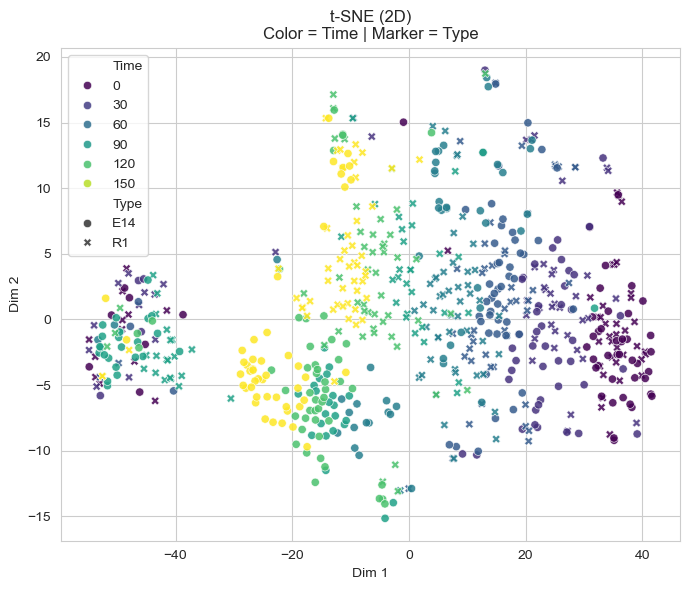

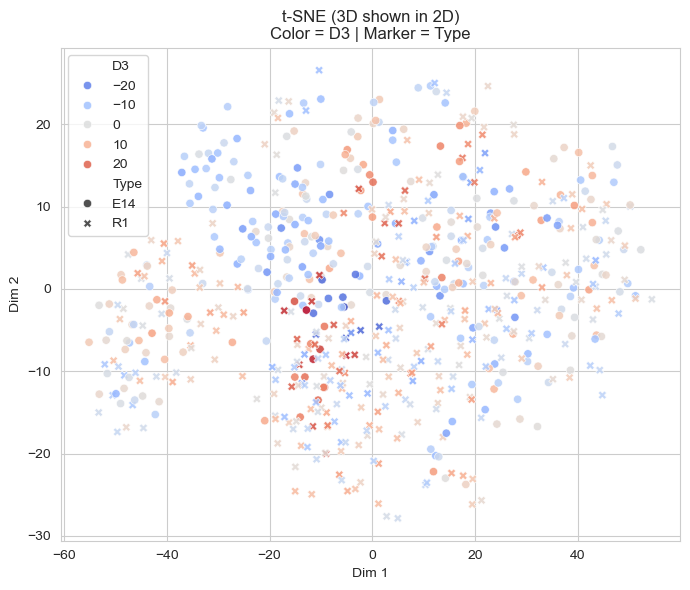

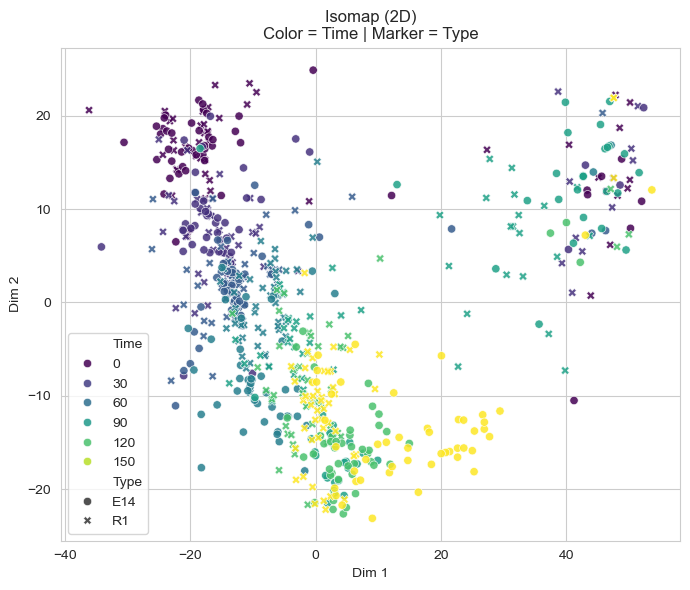

Isomap(2) reconstruction error: (not available in this scikit-learn version)


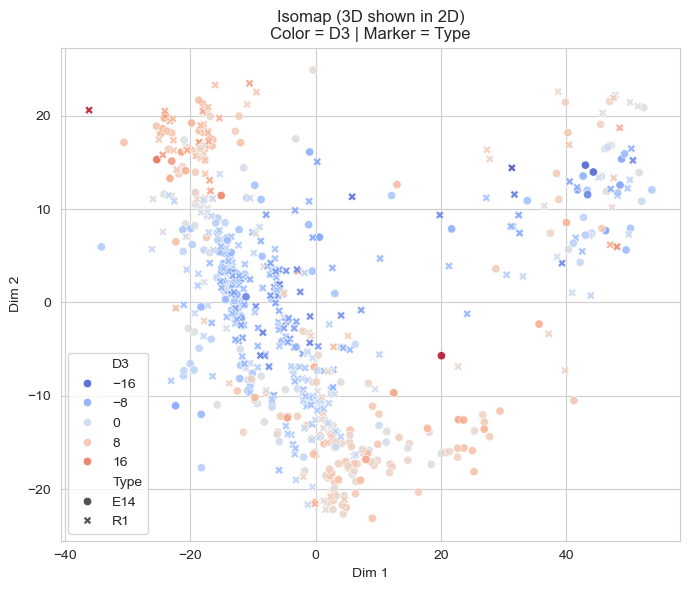

Isomap(3) reconstruction error: (not available in this scikit-learn version)

REPORT NOTES:
- PCA preserves global linear structure; it often shows smooth gradients/trajectories.
- t-SNE highlights local neighborhoods (clusters/blobs); global distances are not meaningful.
- Isomap attempts to preserve manifold (geodesic) distances and may show smoother trajectories than t-SNE.
- Look for whether time forms a smooth color progression (trajectory) and whether E14 vs R1 separate.


In [ ]:
# Part 5 — Non-linear Dimensionality Reduction (t-SNE) + Bonus Isomap

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE, Isomap

if "Time" not in df.columns or "Type" not in df.columns:
    raise ValueError("Your dataframe must contain 'Time' and 'Type' columns.")

meta_time = df["Time"].values
meta_type = df["Type"].values

# Keep ONLY numeric columns (this removes string IDs)
X = df.select_dtypes(include=[np.number]).copy()

# If Time is numeric, remove it from X
if "Time" in X.columns:
    X = X.drop(columns=["Time"])

# Drop all-NaN columns (just in case)
X = X.dropna(axis=1, how="all")

# Drop zero-variance genes
variances = X.var(skipna=True)
X = X.loc[:, variances > 0]

# Fill remaining NaNs using median per gene
X = X.fillna(X.median(numeric_only=True))


# 2) Standardize
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Safety: remove any remaining NaN/inf after scaling
X_scaled = np.nan_to_num(X_scaled, nan=0.0, posinf=0.0, neginf=0.0)

print("Sanity checks:")
print("  X shape (cells x genes):", X.shape)
print("  Any NaNs in X_scaled?:", np.isnan(X_scaled).any())
print("  Any infs in X_scaled?:", np.isinf(X_scaled).any())


# Helper plotting functions
def plot_2d(df2, title):
    plt.figure(figsize=(7, 6))
    sns.scatterplot(
        data=df2.sort_values("Time"),
        x="D1", y="D2",
        hue="Time",
        style="Type",
        palette="viridis",
        alpha=0.85
    )
    plt.title(title)
    plt.xlabel("Dim 1")
    plt.ylabel("Dim 2")
    plt.tight_layout()
    plt.show()

def plot_3d_as_2d(df3, title):
    plt.figure(figsize=(7, 6))
    sns.scatterplot(
        data=df3,
        x="D1", y="D2",
        hue="D3",
        style="Type",
        palette="coolwarm",
        alpha=0.85
    )
    plt.title(title)
    plt.xlabel("Dim 1")
    plt.ylabel("Dim 2")
    plt.tight_layout()
    plt.show()

def print_isomap_error_if_available(model, label):
    # Some sklearn versions do not have reconstruction_error_
    if hasattr(model, "reconstruction_error_"):
        print(f"{label} reconstruction error:", model.reconstruction_error_)
    else:
        print(f"{label} reconstruction error: (not available in this scikit-learn version)")

# Reference: PCA(2) explained variance (for comparison only)
pca2 = PCA(n_components=2, random_state=0)
pca2.fit(X_scaled)
evr = pca2.explained_variance_ratio_

print("\nReference PCA(2) explained variance:")
print(f"  PC1: {evr[0]:.4f} ({evr[0]*100:.2f}%)")
print(f"  PC2: {evr[1]:.4f} ({evr[1]*100:.2f}%)")
print(f"  Total: {evr.sum():.4f} ({evr.sum()*100:.2f}%)")

# 3
tsne2 = TSNE(
    n_components=2,
    perplexity=30,
    learning_rate="auto",
    init="pca",
    random_state=0
)
X_tsne2 = tsne2.fit_transform(X_scaled)

tsne2_df = pd.DataFrame(X_tsne2, columns=["D1", "D2"])
tsne2_df["Time"] = meta_time
tsne2_df["Type"] = meta_type

plot_2d(tsne2_df, "t-SNE (2D)\nColor = Time | Marker = Type")


# 4) t-SNE (3D) — visualized
tsne3 = TSNE(
    n_components=3,
    perplexity=30,
    learning_rate="auto",
    init="pca",
    random_state=0
)
X_tsne3 = tsne3.fit_transform(X_scaled)

tsne3_df = pd.DataFrame(X_tsne3, columns=["D1", "D2", "D3"])
tsne3_df["Time"] = meta_time
tsne3_df["Type"] = meta_type

plot_3d_as_2d(tsne3_df, "t-SNE (3D shown in 2D)\nColor = D3 | Marker = Type")


# Bonus: Isomap (2D and 3D)

iso2 = Isomap(n_components=2, n_neighbors=10)
X_iso2 = iso2.fit_transform(X_scaled)

iso2_df = pd.DataFrame(X_iso2, columns=["D1", "D2"])
iso2_df["Time"] = meta_time
iso2_df["Type"] = meta_type

plot_2d(iso2_df, "Isomap (2D)\nColor = Time | Marker = Type")
print_isomap_error_if_available(iso2, "Isomap(2)")

iso3 = Isomap(n_components=3, n_neighbors=10)
X_iso3 = iso3.fit_transform(X_scaled)

iso3_df = pd.DataFrame(X_iso3, columns=["D1", "D2", "D3"])
iso3_df["Time"] = meta_time
iso3_df["Type"] = meta_type

plot_3d_as_2d(iso3_df, "Isomap (3D shown in 2D)\nColor = D3 | Marker = Type")
print_isomap_error_if_available(iso3, "Isomap(3)")


# Report-ready notes
print("\nREPORT NOTES:")
print("- PCA preserves global linear structure; it often shows smooth gradients/trajectories.")
print("- t-SNE highlights local neighborhoods (clusters/blobs); global distances are not meaningful.")
print("- Isomap attempts to preserve manifold (geodesic) distances and may show smoother trajectories than t-SNE.")
print("- Look for whether time forms a smooth color progression (trajectory) and whether E14 vs R1 separate.")
